# Fundamentals of Artificial Intelligence Programme (2024/25 Q1)
## SVMs and Decision Trees

### Part 1: SVMs
Author: Tom Viering and Aleksander Buszydlik                         
Revised by Akash Amalan

**WHAT** This nonmandatory lab consists of several programming tasks and pen-and-paper questions. Successful completion of the assignment and handing it in for grading can reward you with a bonus point.

**WHY** The exercises are meant to help you learn about the concept of support vector machines. 

**HOW** Follow the exercises in the notebook on your own. For questions and feedback please consult the TAs during the lab session.

**Questions 1 and 2 are graded.**

**Exercise 1** Below, you can see 3 SVM models - analyze them and answer the questions for each of them.

$(1)$ ![SVM_1](images/support_vectors_1.png)

$(2)$ ![SVM_2](images/support_vectors_2.png)

$(3)$ ![SVM_3](images/support_vectors_3.png)


<div style="background-color:#c2eafa">

**Question 1.1** Give the respective numbers of the support vectors for all three graphs.


<div style="background-color:#f1be3e">
    
[//]: # (START ANSWER)    
1. _Write your answer here._
    (1) 3 support vectors
    (2) 3 support vectors
    (3) 2 support vector
    
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">
   
**Question 1.2** Estimate (from the pictures) the width of the margins. You can take the width as the distance from the boundary to the support vector.
   

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
1. _Write your answer here._
(1) about 2
(2) 2.5
(3) 5
    
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 1.3** In which graph does the SVM suffer from not properly scaled features? Why can it be important to scale the features before training the SVM?



<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
In graph 3, right now the vertical feature weighs much heavier than the horizontal one. The boundary could separate the data much more efficiently if scaling is applied.
    
[//]: # (END ANSWER)

**Exercise 2** In this exercise you will start by creating a pen-and-paper SVM model for linearly separable data (i.e. a *hard margin SVM*). Our dataset is as follows:

1. object of class A at $(0, 0)$
2. object of class B at $(1, 0)$
3. object of class B at $(1, 1)$



<div style="background-color:#c2eafa">

**Question 2.1** Draw the points in a Cartesian coordinate system and fit a decision boundary of the support vector classifier.

<div style="background-color:#c2eafa">

**Question 2.2** Indicate which of the objects are the support vectors.

<div style="background-color:#f1be3e">
    
[//]: # (START ANSWER)
_Write your answer here._
    All are support vectors

[//]: # (END ANSWER)


<div style="background-color:#c2eafa">


**Question 2.3** Indicate how large is the margin.

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
 0.5
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 2.4** Suppose we have obtained a new observation of class B located at $(2, 0)$. What will the decision boundary look like after we add this new object? What about the margin?

<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
_Write your answer here._
The decision boundary and margins do not change, the support vectors are unchanged.
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">


**Question 2.5** Suppose we have obtained a new observation of class A located at $(0, 1)$. What will the decision boundary look like after we add this new object? What about the margin? What if the object belonged to class B?

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
Decision boundary and margins remain unchanged. If the object belonged to class B, the boundary would shift 45 degrees and the margin would shrink to sqrt(0.125).
[//]: # (END ANSWER)


Now, we will verify your answers by training a [`SVC` model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from Scikit. We will also define a function to plot the decision boundary of the classifier.

In [1]:
# Here is some plotting code that we will use in this exercise
import matplotlib.pyplot as plt

def plot_svm(model):
    ax = plt.gca()
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    
    xs, ys = np.meshgrid(np.linspace(x_lim[0], x_lim[1], 50),
                         np.linspace(y_lim[0], y_lim[1], 50))
    Z = model.decision_function(np.c_[xs.ravel(), ys.ravel()]).reshape(xs.shape)
    
    plt.contour(xs, ys, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--']) 
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, linewidth=1, facecolors='none')
    plt.tight_layout()

<div style="background-color:#c2eafa">

**Question 2.6** Finish the function which will train an `SVC()` classifier given an array of features and the labels. Make sure to set `kernel='linear'`, `C=1e10` (this will effectively make our classifier a hard-margin SVC, and pass the `random_state` hyper-parameter. Also, define the arrays `X` and `y` describing the first three points.  
**Note:** Make sure to encode class A as `0` and class B as `1`

Model accuracy: 1.0


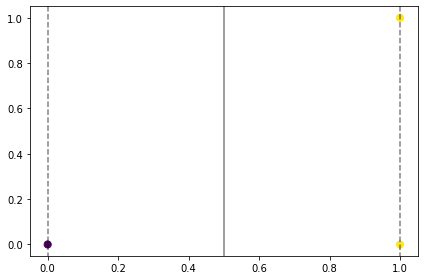

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_1 = np.array([[0, 0], [1,0], [1, 1]])
y_1 = np.array([0, 1, 1])
# Define the X and y arrays
# START ANSWER


# END ANSWER

svm = SVC(kernel='linear', C=1e10, random_state=42)
svm.fit(X_1, y_1)
predictions_1 = svm.predict(X_1)
# Create an SVC classifier
# START ANSWER
# END ANSWER

print("Model accuracy: {}".format(accuracy_score(predictions_1, y_1)))
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=50, cmap='viridis')
plot_svm(svm)
plt.show()


<div style="background-color:#c2eafa">
    
**Question 2.7** Now add the observation of class B at $(2, 0)$ and retrain the model.

Model accuracy: 1.0


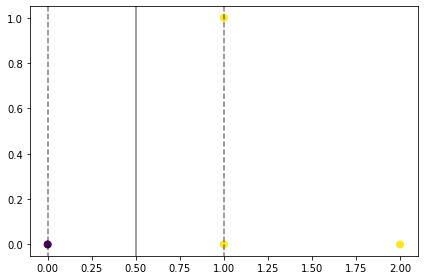

In [3]:
X_2 = np.array([[0, 0], [1,0], [1, 1],[2,0]])
y_2 = np.array([0, 1, 1, 1])
model_linear_2 = SVC(kernel='linear', C=1e10, random_state=42)
model_linear_2.fit(X_2, y_2)
predictions = []
predictions_2 = model_linear_2.predict(X_2)
# First define the X and y arrays
# START ANSWER
# END ANSWER

print("Model accuracy: {}".format(accuracy_score(predictions_2, y_2)))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=50, cmap='viridis')
plot_svm(model_linear_2)
plt.show()

<div style="background-color:#c2eafa">
    
**Question 2.8** Finally, verify what happens when we add an object of class A at $(0, 1)$. Also check what happens if we make that sample belong to class B.

Model accuracy: 1.0


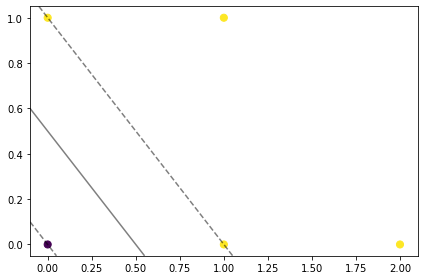

In [4]:
X = []
y = []
model = None
predictions = []

# First define the X and y arrays
# START ANSWER
X= np.array([[0, 0], [1,0], [1, 1],[2,0],[0,1]])
y = np.array([0, 1, 1, 1, 1])

model_linear_3 = SVC(kernel='linear', C=1e10, random_state=42)
model_linear_3.fit(X, y)

predictions = model_linear_3.predict(X)
# END ANSWER

print("Model accuracy: {}".format(accuracy_score(predictions, y)))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svm(model_linear_3)
plt.show()

**Exercise 3** Often our classes will not be linearly separable and in such cases we will need to train a _soft-margin SVM_. These classifiers allow for misclassifications, and as such they can be used for non-seperable problems.

<div style="background-color:#c2eafa">
    
**Question 3.1** Give another reason why we may want to opt for a soft-margin SVM even in case the problem is linearly seperable.

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
To end up with a larger margin
    
    
[//]: # (END ANSWER)

We will now practice with soft-margin SVMs. We have prepared a dataset of two classes, we would like to train an SVM model to classify the samples as well as possible. We will train a linear SVM model and plot its predictions.

Model accuracy: 0.85


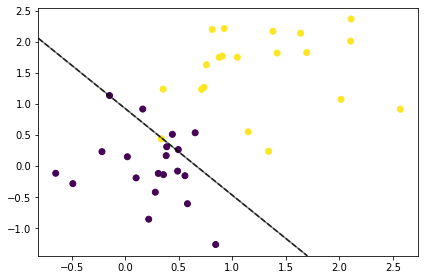

In [5]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.genfromtxt('data/mystery_dataset_1.csv', delimiter=',')

model_soft= SVC(kernel='linear', C=1e10)
model_soft.fit(dataset[:, :2], dataset[:, 2])
predictions_soft = model_soft.predict(dataset[:, :2])

print("Model accuracy: {}".format(accuracy_score(predictions_soft, dataset[:, 2])))
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='viridis')
plot_svm(model_soft)
plt.show()

<div style="background-color:#c2eafa">


**Question 3.2** Our model seems to have a very small margin. How should we set the `C` parameter to make the margin larger and increase the accuracy of the classifier? Why does the value of `C` make a difference?

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
A smaller value for the C parameter will result in a larger margin. A high value for C means a high cost for classificaiton errors, C therefore influences the boundary in order to minimize this.
    
    
[//]: # (END ANSWER)

To continue our exploration of SVM margins we will load another dataset and train a model.

Model accuracy: 0.825


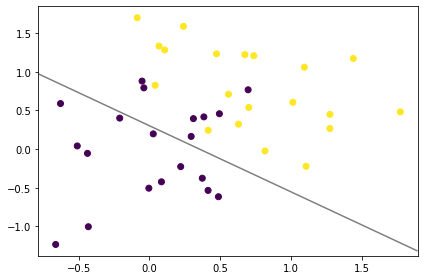

In [6]:
dataset = np.genfromtxt('data/mystery_dataset_2.csv', delimiter=',')

svm_with_c = SVC(kernel='linear', C=0.0001)
svm_with_c.fit(dataset[:, :2], dataset[:, 2])
predictions_with_c = svm_with_c.predict(dataset[:, :2])

print("Model accuracy: {}".format(accuracy_score(predictions_with_c, dataset[:, 2])))
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='viridis')
plot_svm(svm_with_c)
plt.show()

<div style="background-color:#c2eafa">
    
**Question 3.3** Again, something went wrong with the classifier and we are achieving suboptimal results. Explain how we should tune the model to improve it. Why does your suggested change make a difference?



<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
The cost associated with margin violations is now very low, this leads to many misclassifications. C should be moderated to balance the model and work for general cases but keep accuracy.
    
    
[//]: # (END ANSWER)
    

<div style="background-color:#c2eafa">

**Question 3.4** For these questions we were luckily working in 2D so we could visually see what is the problem. In practice, we might work with 10 or more features, and it is harder to figure out what is the appropiate value for C. In that case, how should we determine the hyperparameter C?


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
Cross validation: Train the model on subsets of features and choose a proper C value, validate with another subset of features to check if C is properly chosen.
    
    
[//]: # (END ANSWER)

**Exercise 4** Computing some losses and the cost function on pen and paper. 

We have trained an SVM on some data. It will classify objects to the top as purple, and below as yellow. Look at the plot below and answer the questions.

![SVM misclassifications](images/misclassifications.png)

<div style="background-color:#c2eafa">

**Question 4.1** Give the respective numbers of the point(s) that constitute margin violations.


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
 2, 6, 7, 3
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 4.2** Calculate the size of the margin violation for  point 6.


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
0.2
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">
    
**Question 4.3** Calculate the hinge loss for the point 6.



<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    0.4
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">
    
**Question 4.4** Knowing that the model was trained with `C=100` calculate the cost function of this SVM.

**Hint:** $\frac{1}{||w||}$ is equal to the size of the margin. 


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    0.5*4+100*(0.4+0.2+2)=262

[//]: # (END ANSWER)

**Exercise 5** In this exercise we will work with a (part of) the iris dataset. It is a very famous machine learning dataset consisting of measurements of petals and sepals taken for three species of iris flowers. For our purposes we will only classify whether a flower belongs to the *versicolor* or *virginica* species based on the width and length of its petals. We will load the dataset and plot the classes.

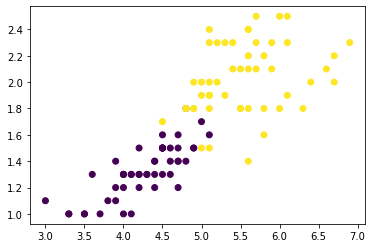

In [7]:
iris_dataset = np.genfromtxt('data/iris.csv', delimiter=',')

plt.scatter(iris_dataset[:, 0], iris_dataset[:, 1], c=iris_dataset[:, 2], cmap='viridis')
plt.show()

<div style="background-color:#c2eafa">
    
**Question 5.1** Are the classes linearly separable? Could we use a hard-margin SVM to give predictions?




<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    Yes they are linearly separable when using a soft margin SVM.
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">

**Question 5.2** We will create several SVM models with varying values of `C`. Finish the code below using [the model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from Scikit library.

Model 1 accuracy: 0.92 C:0.01


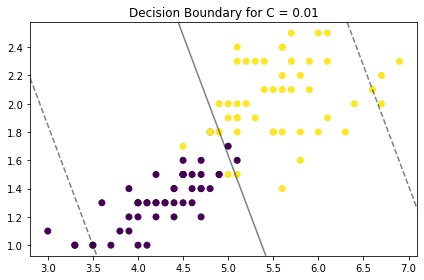

Model 2 accuracy: 0.95 C:0.1


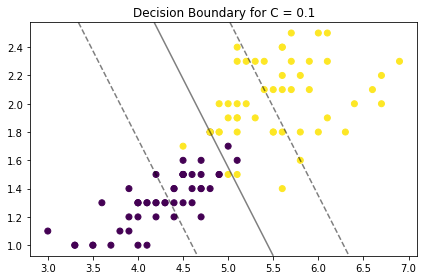

Model 3 accuracy: 0.95 C:1


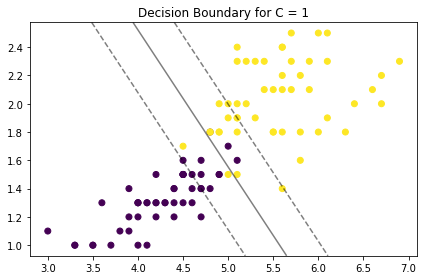

Model 4 accuracy: 0.95 C:10


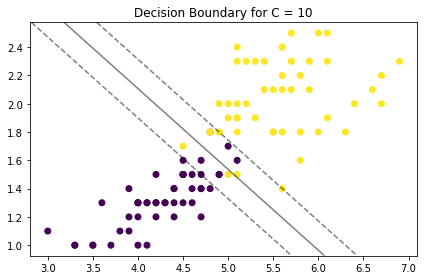

Model 5 accuracy: 0.94 C:100


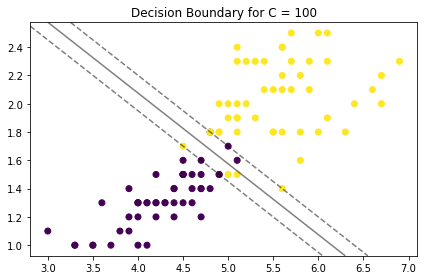

In [9]:
Cs = [0.01, 0.1, 1, 10, 100]

for i, C in enumerate(Cs):
    predictions = []
    # Train an SVM model passing it C as hyper-parameter
    # START ANSWER
    svm_model = SVC(kernel='linear', C=C, random_state=42)
    svm_model.fit(iris_dataset[:, :2], iris_dataset[:, 2])    
    predictions = svm_model.predict(iris_dataset[:, :2])
    
    # END ANSWER
    
    print("Model {} accuracy: {} C:{}".format(i + 1, accuracy_score(predictions, iris_dataset[:, 2]),C))
    
    # Plot the decision boundary of our model.
    # START ANSWER
    plt.figure()
    plt.title(f"Decision Boundary for C = {C}")
    plt.scatter(iris_dataset[:, 0], iris_dataset[:, 1], c=iris_dataset[:, 2], cmap='viridis')
    plot_svm(svm_model)
    plt.show()
    # END ANSWER

<div style="background-color:#c2eafa">

**Question 5.3** Explain in 3-4 sentences what happens to the SVM margin as we vary the value of `C`. Why does this happen?


<div style="background-color:#f1be3e">
    
[//]: # (START ANSWER)
_Write your answer here._
  As the cost of error increases, margins decrease. This happens because the total cost function is minimized for the model, a high cost of error presses the margin down to minimize the total cost function

[//]: # (END ANSWER)

### Part 2: Decision Trees
Author: Tom Viering and Juan Molano  
Revised by: Prajit Bhaskaran

**WHAT** This lab consists of some programming and insight exercises/questions.

**WHY** The exercises are meant to familiarize you with the basic concepts of decision trees.

**HOW** Follow the exercises in the notebook on your own or with a fellow student. For questions and feedback please
consult the TA's during the lab session.

**Questions 2 and 5 are graded.**

<div style="background-color:#c2eafa">
    
**Exercise 1** When to use Decision Trees

Consider the following scenarios:

1. Predicting the weather
2. Calculating the amount of tax to pay
3. Predicting whether someone receives a loan from a bank
4. Predicting the delay of an airplane flight
5. Predicting whether someone is eligible to be released on bail

For which of these scenarios would you use a Decision Tree? Give a small argument for each scenario.



<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
1. _Write your answer here._

[//]: # (END ANSWER)

**Exercise 2** Calculations with Decision Trees

Say that we have a classification problem with two different classes (Class 1 and Class 2). We want to classify
 the following 2-dimensional dataset using the decision tree model also shown below.

![points](images/exercise_2_points.png)

![decision_tree](images/exercise_2_decision_tree.png)

Note: an arrow to the left means that the question (feature_1 <= threshold) was answered with Yes, and if the arrow goes to the right the answer is No. 

<div style="background-color:#c2eafa">

**Question 2.1** Compute the prediction of object $(6, 5)$.












<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
1
    
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 2.2** Compute the posterior probabilities in leaf 3 (from top to bottom).


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
    p1=3/3=1
    p2=0/3=0
    
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 2.3** Compute the Gini purity for leaf 2 (from top to bottom).


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
    Gini=1-(0.75**2+0.25**2)=1-0.625=0.375
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">

**Question 2.4** For the leaf 2 (from top to bottom) should a split be made on `feature 1` <= 6.5 or
`feature 2` <= 4.5? Include a computation of the cost function for both options.

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
    m=7
    mleft(6.5)=6
    mright(6.5)=1
    Ginileft(6.5)=1-((5/6)**2+(1/6)**2)=0.28
    Giniright(6.5)=0
    J(6.5)=6/7*0.28=0.24
    
    mleft(4.5)=2
    mright(4.5)=5
    Ginileft(4.5)=0
    Giniright(4.5)=1-(0.8**2+0.2**2)=0.68
    J(4.5)=5/7*0.68=0.49
    
    The split on 6.5 would have a lower cost than on 4.5, so that choice should be made.
    
    
[//]: # (END ANSWER)

**Exercise 3** Drawing Trees

<div style="background-color:#c2eafa">

**Question 3.1** Given the following Tree, draw a 2D plot of the predictions by this regression tree.









![decision](images/exercise_3_decision_tree.png)

<div style="background-color:#f1be3e">

   
[//]: # (START ANSWER)
_Write your answer here._

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 3.2** Given the following 2D plot of a regression Tree, draw the Regression Decision Tree.




![grid](images/exercise_3_grid.png)


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._

[//]: # (END ANSWER)

**Exercise 4** Decision Trees as non-linear classifiers

<div style="background-color:#c2eafa">

**Question 4.1** Given the XOR-problem as pictured below:



![points](images/exercise_4_points_new.png)

<div style="background-color:#c2eafa">

Draw a decision tree that solves the problem perfectly.

[//]: # (START ANSWER)
[//]: # (END ANSWER)

**Exercise 5** Predictions using Decision Trees

Imagine we are working at a credit card company. We are interested to build a machine learning model that can determine
whether a credit card application should be approved. To this end, we have some historical data of credit card applicants that were either accepted or rejected.

Let's load the credit card data using pandas into the variable `cc_data`.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
np.random.seed(42)

cc_data = pd.read_csv("data/AER_credit_card_data.csv")

<div style="background-color:#c2eafa">

**Question 5.1** Have a look at the data and see if it is correctly loaded. How many rows and how many columns are there?

In [4]:
# START ANSWER
#1319 rows
#12 columns
# END ANSWER

In this dataset we are interested in predicting whether an application will receive a credit card. This is indicated in
the column 'card'. For more information on the other columns, see [here](https://www.kaggle.com/dansbecker/aer-credit-card-data/version/1).

<div style="background-color:#c2eafa">

**Question 5.2** Explain why for this application it is useful to use a decision tree instead of a linear
classifier such as an SVM, or even a non-linear model such as a neural network.





<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    There is a lot of data and data like this may not always be linearly correlated, in that case decision trees are able to out perform SVM. In addition, interpretability is much easier in a decision tree than in a neural network.

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 5.3** As a first step, we are going to preprocess the dataset so that all features are numeric which is required by Scikit.  
**Hint:** Use the pandas function [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Look at the usage examples at the bottom of the page.

In [11]:
# START ANSWER
cc_data_dummies=pd.get_dummies(cc_data)
print(cc_data_dummies)
# END ANSWER

      reports       age  income     share  expenditure  dependents  months  \
0           0  37.66667  4.5200  0.033270   124.983300           3      54   
1           0  33.25000  2.4200  0.005217     9.854167           3      34   
2           0  33.66667  4.5000  0.004156    15.000000           4      58   
3           0  30.50000  2.5400  0.065214   137.869200           0      25   
4           0  32.16667  9.7867  0.067051   546.503300           2      64   
...       ...       ...     ...       ...          ...         ...     ...   
1314        0  33.58333  4.5660  0.002146     7.333333           0      94   
1315        5  23.91667  3.1920  0.000376     0.000000           3      12   
1316        0  40.58333  4.6000  0.026513   101.298300           2       1   
1317        0  32.83333  3.7000  0.008999    26.996670           0      60   
1318        0  48.25000  3.7000  0.111619   344.157500           2       2   

      majorcards  active  card_no  card_yes  owner_no  owner_ye

<div style="background-color:#c2eafa">

**Question 5.4**  Note that each dummy variable only has two levels, they are all either 'yes' or 'no'. If we use get_dummies naively, we will get a column: `card_yes` and `card_no`. But one column is already enough! If `card_yes` is 1, we  already know that `card_no` must be 0. Look one more time at the documentation to fix the issue.  
**Note:** Make sure that afterward the dataframe has the following columns: `reports`, `age`, `income`, `share`, `expenditure`,
`dependents`, `months`, `majorcards`, `active`, `card_yes`, `owner_yes`, `selfemp_yes`.

In [17]:
# START ANSWER
cc_data_dummies=pd.get_dummies(cc_data, drop_first=True)
print(cc_data_dummies)
# END ANSWER

      reports       age  income     share  expenditure  dependents  months  \
0           0  37.66667  4.5200  0.033270   124.983300           3      54   
1           0  33.25000  2.4200  0.005217     9.854167           3      34   
2           0  33.66667  4.5000  0.004156    15.000000           4      58   
3           0  30.50000  2.5400  0.065214   137.869200           0      25   
4           0  32.16667  9.7867  0.067051   546.503300           2      64   
...       ...       ...     ...       ...          ...         ...     ...   
1314        0  33.58333  4.5660  0.002146     7.333333           0      94   
1315        5  23.91667  3.1920  0.000376     0.000000           3      12   
1316        0  40.58333  4.6000  0.026513   101.298300           2       1   
1317        0  32.83333  3.7000  0.008999    26.996670           0      60   
1318        0  48.25000  3.7000  0.111619   344.157500           2       2   

      majorcards  active  card_yes  owner_yes  selfemp_yes  
0 

In [13]:
# Code that verifies the columns are indeed correct here using
assert (list(cc_data_dummies.columns) == ['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active', 'card_yes', 'owner_yes',
       'selfemp_yes']) , "Columns names are not correct."

Now we store the class label in y, and we store the other features in `X`. We also split the dataset in a training and test set

In [18]:
y = cc_data_dummies["card_yes"].to_numpy()
cc_data_without_y = cc_data_dummies.drop("card_yes", axis=1)
X = cc_data_without_y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42) 

<div style="background-color:#c2eafa">

**Question 5.5** Train a decision tree model using the default hyper-parameters and compute the accuracy on the training and the test set.

In [28]:
# START ANSWER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy: {:.2f}".format(train_accuracy))
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test set accuracy: {:.2f}".format(test_accuracy))
# END ANSWER

Training set accuracy: 1.00
Test set accuracy: 0.97


<div style="background-color:#c2eafa">

**Question 5.6** Given the value of the training accuracy, what concern may we have about
this decision tree?





<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    It may have been overfitted.

[//]: # (END ANSWER)

The following piece of code plots the decision tree.

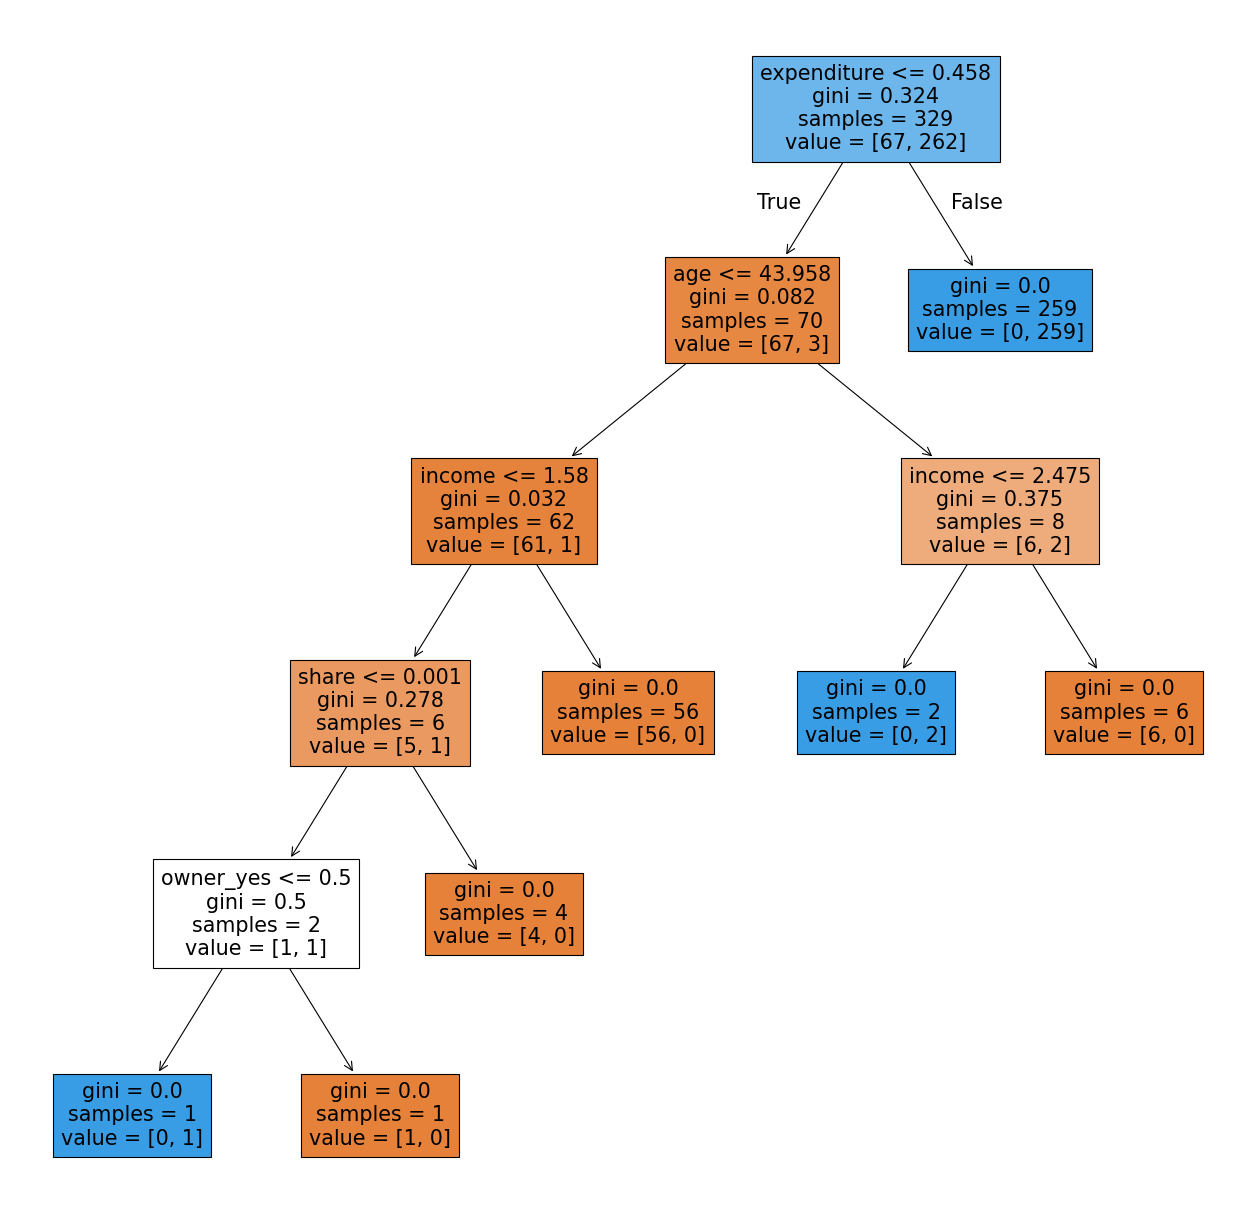

In [29]:
plt.figure(figsize=(20,20),dpi=80)
tree.plot_tree(model,feature_names=cc_data_without_y.columns,filled=True)
plt.show()

<div style="background-color:#c2eafa">


**Question 5.7** How many leaf nodes does this Tree have? What is the height of the tree? Which color is which class?










<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    leafs=7
    depth = 5
    blue is class 2, red is class 1
    
[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 5.8** In each node some information is displayed. What does `samples`, `value` and `gini` mean?


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    samples is total number of datapoints that have ended up in that node
    value is a division between the samples and their classes.
    gini is an index that represents the purity of a node.

[//]: # (END ANSWER)


<div style="background-color:#c2eafa">

**Question 5.9** Given the Tree above, do you think a credit card company is allowed to use this decision tree by law? Do you think this tree treats people in a fair way? Explain your answer.  
**Hint:** To understand the decisions of the tree, consider the meaning of the variables which are given [here](https://www.kaggle.com/dansbecker/aer-credit-card-data/version/1)

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
    I dont think so, the age decision boundary is rather arbitrary and high up in the tree. That is rather discriminating.
    
[//]: # (END ANSWER)


<div style="background-color:#c2eafa">

**Question 5.10:** Retrain the decision tree, but now limit it's depth to 3 (see also the documentation of DecisionTreeClassifier). Again, compute the training accuracy, the test accuracy, and plot the tree. Be sure to pass the `random_state=42` to the decision tree.

Training set accuracy: 1.00
Test set accuracy: 0.97


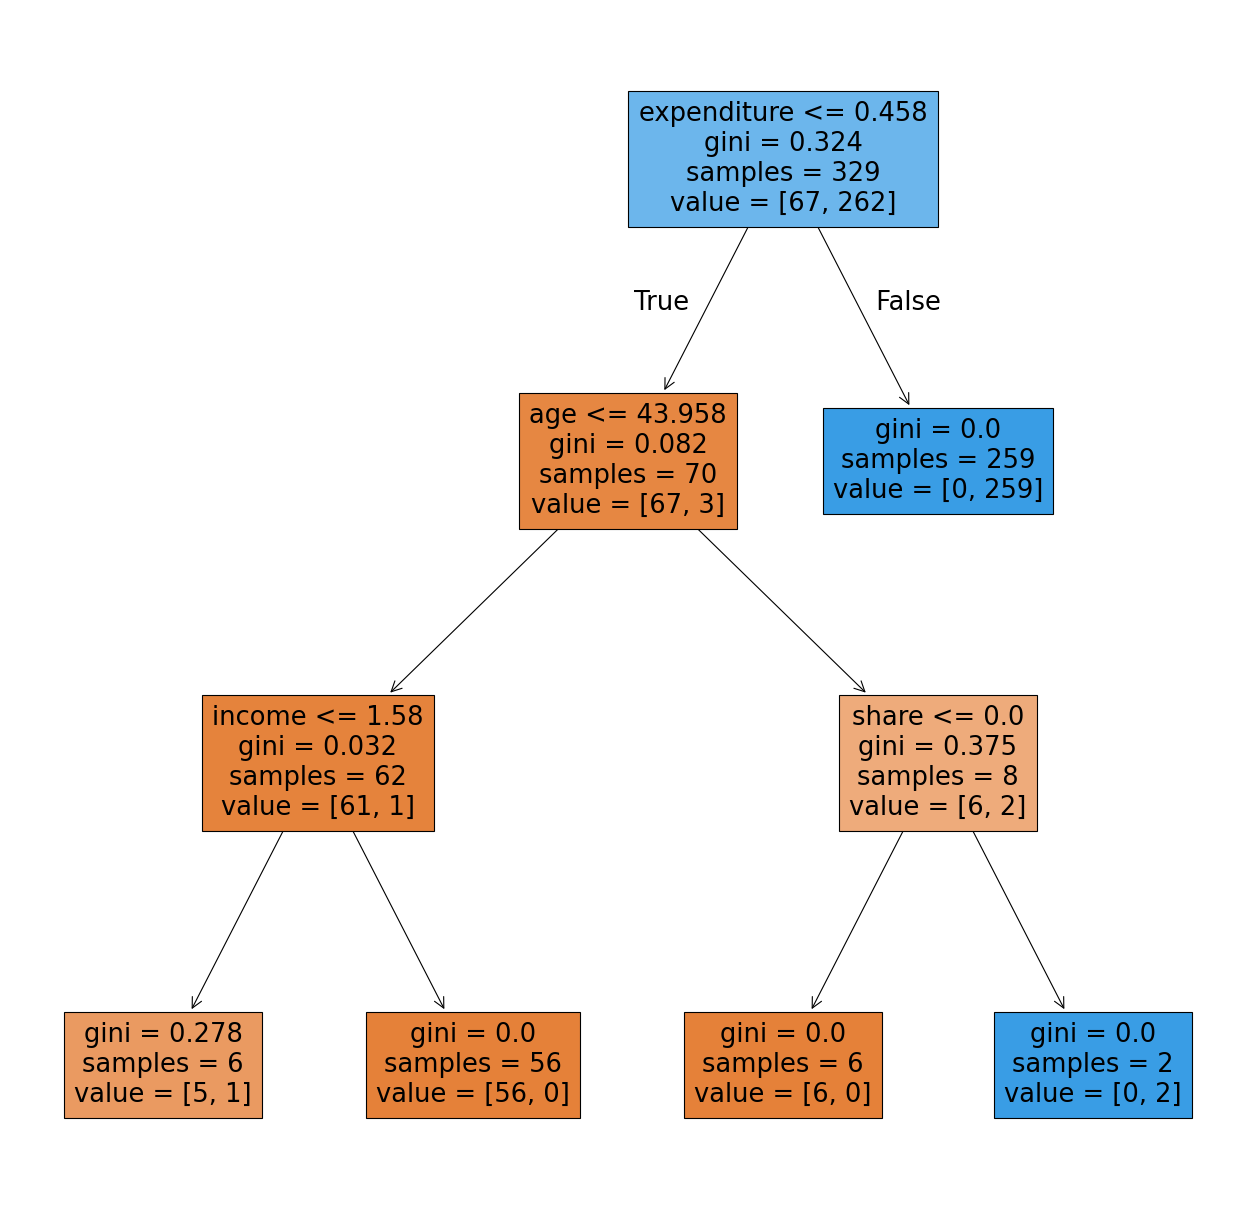

In [32]:
random_state = 42

# START ANSWER
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training set accuracy: {:.2f}".format(train_accuracy))
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test set accuracy: {:.2f}".format(test_accuracy))
plt.figure(figsize=(20,20),dpi=80)
tree.plot_tree(model,feature_names=cc_data_without_y.columns,filled=True)
plt.show()
# END ANSWER

When looking at this decision tree, we can see that there is a split on age <= 43.9. Note that this split doesn't seem to improve the predictions of the decision tree because everything is still classified as orange.

<div style="background-color:#c2eafa">

**Question 5.11**  Explain why this split is made by the decision tree.






<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
    Appearanlty this split gives the highest purity.
[//]: # (END ANSWER)
    


Ideally, the credit card company would automate all credit card applications. However, in some cases, it may still be best to involve a human in the decision.

<div style="background-color:#c2eafa">

**Question 5.12**  Explain for which leaf nodes you would involve a human, and for which leaf nodes you would use an automated decision.


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._
House ownership and age for instance i would suggest a human decision. It is dependent on the size and maybe the mortagage of the house. Age is a very arbitrary thing to make a decision like this on.
    I would let an automated system decide on the income and the share.
    
[//]: # (END ANSWER)

**Exercise 6**

<div style="background-color:#c2eafa">


**Question 6.1** To determine the best hyperparameter setting for max_depth, it is useful to make a plot that explores the hyperparameter. Using a for-loop, try all settings for max_depth from 1 to 10. For each value, train a decision tree and compute the training and test accuracy. Finally, plot the training and test accuracy against the max_depth. 

In [ ]:
# START ANSWER
# END ANSWER

<div style="background-color:#c2eafa">

**Question 6.2**  From the plot, what seems to be the best setting for `max_depth`?





<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._

[//]: # (END ANSWER)

Because the test errors are exactly the same, it is hard to judge which decision tree is superior. If we use cross validation, we can say something more reliable whether one tree is better than the other, because the standard deviations over the different folds tell us how reliable the estimate of the test error is. 

<div style="background-color:#c2eafa">

**Question 6.3** Use cross validation to recreate the plot above. Consider using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) which is built into Scikit. You may make use of the default 5 fold cross validation. Store the results of the cross validation in `cv`.

In [ ]:
from sklearn.model_selection import GridSearchCV

# START ANSWER
# END ANSWER

The following code makes a dataframe from all the cross validation results. Itis useful to have a first look at them.

In [ ]:
pd.DataFrame(cv.cv_results_)

We are also going to display the cross validation results using `pyplot.errorbar`. 

<div style="background-color:#c2eafa">

**Question 6.4** Now make an error bar plot of the cross validation results. The x-axis should display the `max_depth` which ranges from 1 to 10. The y axis should display the `mean_test_accuracy`. The standard deviation should display the
standard deviation of the test accuracy. Note that this is called the `score` in our dataframe.

In [ ]:
# START ANSWER
# END ANSWER

<div style="background-color:#c2eafa">

**Question 6.5** Can we determine which setting of `max_depth` is best from the cross validation results? Why (not)?


 




<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">

**Question 6.6** What setting of the max_depth would you settle for? Why?


<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
_Write your answer here._

[//]: # (END ANSWER)


<div style="background-color:#c2eafa">

**Question 6.7** Have a look at the hyperparameters `min_samples_split`, `min_samples_leaf`, and `max_leaf_nodes`. Explain how these hyperparameters regularize the decision tree.

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
[//]: # (END ANSWER)